In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('D:\\Datasets\\HR Dataset\\HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


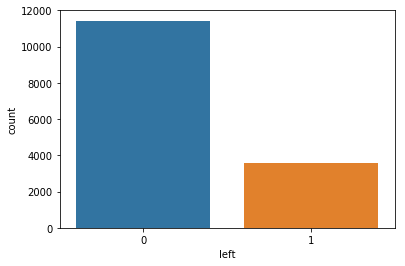

In [5]:
sns.countplot(data['left'])

In [6]:
data['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

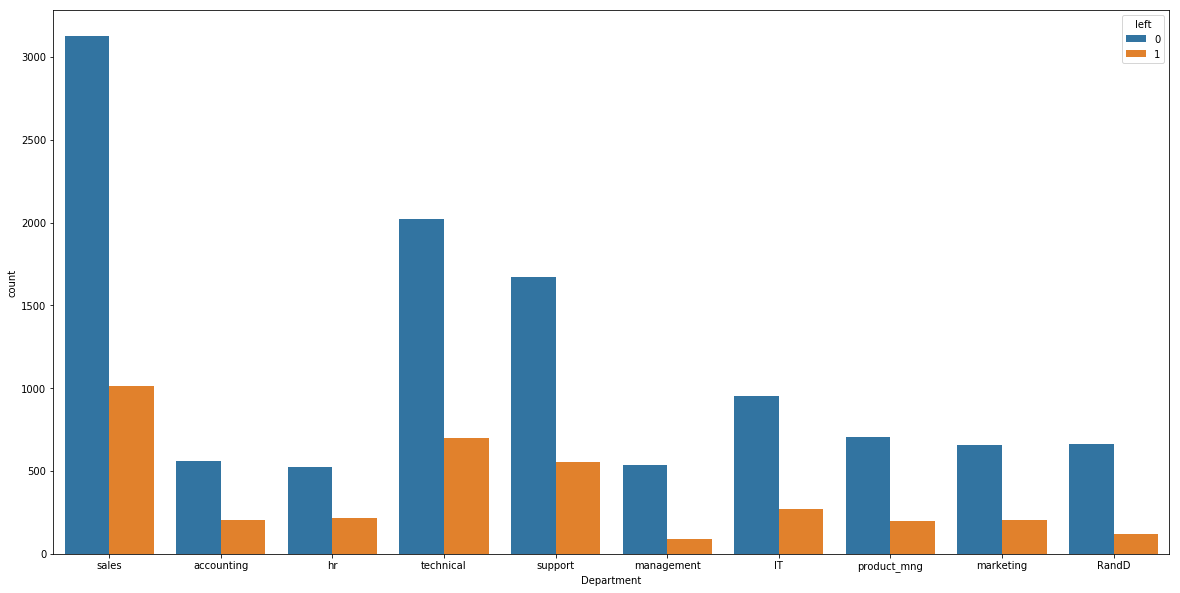

In [7]:
plt.figure(figsize=(20,10))
sns.countplot('Department',hue='left',data=data)

In [8]:
data.isnull().any().sum()

0

In [9]:
pd.options.display.max_info_columns=10
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
data=pd.get_dummies(data,drop_first=True)
data.shape

(14999, 19)

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [12]:
X=data.drop(['left'],axis=1)
y=data['left']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
clf1=RandomForestClassifier(class_weight='balanced')
clf1.fit(X_train,y_train)

C:\Users\Biswajeet.Nayak\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [15]:
pred1=clf1.predict(X_test)
print(accuracy_score(pred1,y_test))
print(classification_report(pred1,y_test))
confusion_matrix(pred1,y_test)

0.9876666666666667
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2311
           1       0.96      0.99      0.97       689

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



array([[2284,   27],
       [  10,  679]], dtype=int64)

In [16]:
clf2=ExtraTreesClassifier(class_weight='balanced')
clf2.fit(X_train,y_train)

C:\Users\Biswajeet.Nayak\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [17]:
pred2=clf2.predict(X_test)
print(accuracy_score(pred2,y_test))
print(classification_report(pred2,y_test))
confusion_matrix(pred2,y_test)

0.9863333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2313
           1       0.96      0.98      0.97       687

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



array([[2283,   30],
       [  11,  676]], dtype=int64)

In [18]:
clf1.feature_importances_

array([0.25437829, 0.12465538, 0.13207073, 0.16047656, 0.27323731,
       0.0147128 , 0.00334605, 0.00296478, 0.00243323, 0.00214437,
       0.0019153 , 0.00092608, 0.00103778, 0.00377618, 0.00346883,
       0.00477152, 0.00969043, 0.00399436])

In [19]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [20]:
cols=pd.DataFrame(data.columns,columns=['Column Name'])
cols.head()

,Column Name
0,satisfaction_level
1,last_evaluation
2,number_project
3,average_montly_hours
4,time_spend_company


In [21]:
score=pd.DataFrame(clf1.feature_importances_,columns=['Score'])
score.head()

,Score
0,0.254378
1,0.124655
2,0.132071
3,0.160477
4,0.273237


In [22]:
feature_matrix_rf=pd.concat([cols,score],axis=1)
feature_matrix_rf.sort_values('Score',ascending=False)

,Column Name,Score
4,time_spend_company,0.273237
0,satisfaction_level,0.254378
3,average_montly_hours,0.160477
2,number_project,0.132071
1,last_evaluation,0.124655
5,Work_accident,0.014713
16,Department_technical,0.009690
15,Department_support,0.004772
17,salary_low,0.003994
13,Department_product_mng,0.003776


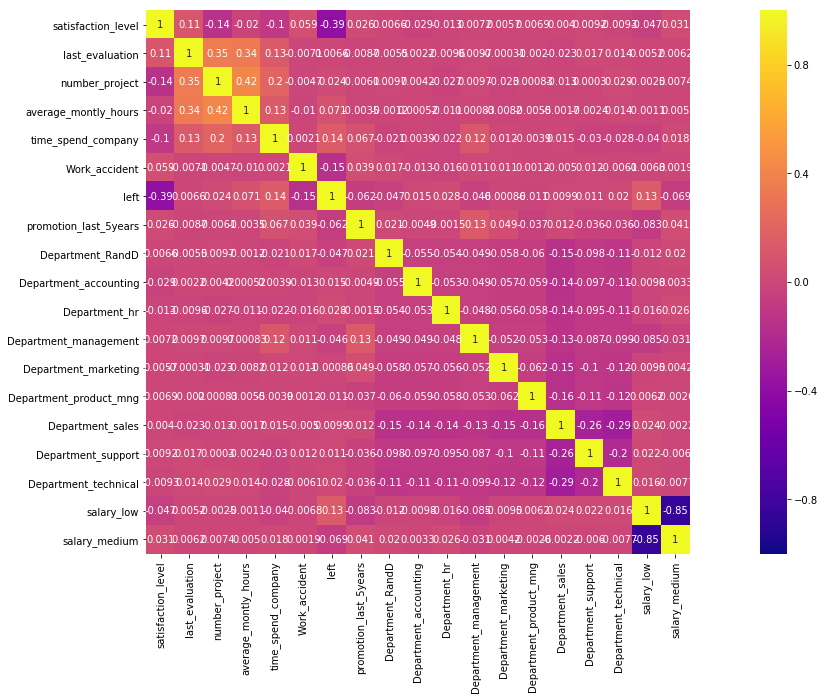

In [23]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),square=True,annot=True,cmap=plt.cm.plasma,vmax=1,vmin=-1)

In [24]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.082832,0.040985
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.011887,0.020402
Department_accounting,-0.028649,0.002193,0.004189,0.000524,0.003909,-0.012836,0.015201,-0.004852,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,-0.009759,0.003285


In [26]:
X_train.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,0.612741,0.716207,3.806317,201.025252,3.501625,0.144512,0.022002,0.051671,0.052671,0.048504,0.043337,0.055755,0.062005,0.276440,0.147179,0.181098,0.486874,0.431119
std,0.248989,0.171490,1.234063,49.928839,1.463216,0.351623,0.146695,0.221371,0.223385,0.214838,0.203623,0.229457,0.241175,0.447255,0.354299,0.385116,0.499849,0.495253
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
test={'satisfaction_level':0.60,'last_evaluation':0.0,'number_project':1,'average_montly_hours':154,'time_spend_company':0.25,'Work_accident':0,'promotion_last_5years':0,'Department_RandD':0,'Department_accounting':0,'Department_hr':0,'Department_management':0,'Department_marketing':0,'Department_product_mng':0,'Department_sales':0,'Department_support':0,'Department_technical':0,'salary_low':1,'salary_medium':0}
test=pd.DataFrame([test],columns=test.keys())
test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.6,0.0,1,154,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0


In [63]:
clf1.predict(test)

array([0], dtype=int64)

In [53]:
feature_matrix_rf

,Column Name,Score
0,satisfaction_level,0.254378
1,last_evaluation,0.124655
2,number_project,0.132071
3,average_montly_hours,0.160477
4,time_spend_company,0.273237
5,Work_accident,0.014713
6,left,0.003346
7,promotion_last_5years,0.002965
8,Department_RandD,0.002433
9,Department_accounting,0.002144


In [59]:
data.loc[data['left']==1,data.columns.str.contains('Department')]

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0
